In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Initialize the video capture object
video_path = '/home/ikharitonov/Desktop/20204321_343_5.avi'
cap = cv2.VideoCapture(video_path)

# Initialize the background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2(history=5000, varThreshold=50, detectShadows=True)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the background subtractor to get the foreground mask
    fgmask = fgbg.apply(frame)

    # Remove noise by applying a series of erosions and dilations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)

    # Apply GaussianBlur to reduce noise and improve circle detection
    blurred = cv2.GaussianBlur(fgmask, (9, 9), 2, 2)

    # Detect circles in the blurred image
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=5, maxRadius=50)

    if circles is not None:
        circles = np.uint8(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(frame, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(frame, (i[0], i[1]), 2, (0, 0, 255), 3)

    # Display the result
    cv2.imshow('Frame', frame)
    cv2.imshow('Foreground Mask', fgmask)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [3]:
help(cap.read)

Help on built-in function read:

read(...) method of cv2.VideoCapture instance
    read([, image]) -> retval, image
    .   @brief Grabs, decodes and returns the next video frame.
    .   
    .       @param [out] image the video frame is returned here. If no frames has been grabbed the image will be empty.
    .       @return `false` if no frames has been grabbed
    .   
    .       The method/function combines VideoCapture::grab() and VideoCapture::retrieve() in one call. This is the
    .       most convenient method for reading video files or capturing data from decode and returns the just
    .       grabbed frame. If no frames has been grabbed (camera has been disconnected, or there are no more
    .       frames in video file), the method returns false and the function returns empty image (with %cv::Mat, test it with Mat::empty()).
    .   
    .       @note In @ref videoio_c "C API", functions cvRetrieveFrame() and cv.RetrieveFrame() return image stored inside the video
    . 

In [13]:
video_path = '/home/ikharitonov/Desktop/20204321_343_5.avi'
cap = cv2.VideoCapture(video_path)
frame_number=1000
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res, frame = cap.read()
frame.shape

(300, 300, 3)

In [129]:
img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
circles = cv2.HoughCircles(th1, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=10, maxRadius=50)

In [96]:
circles

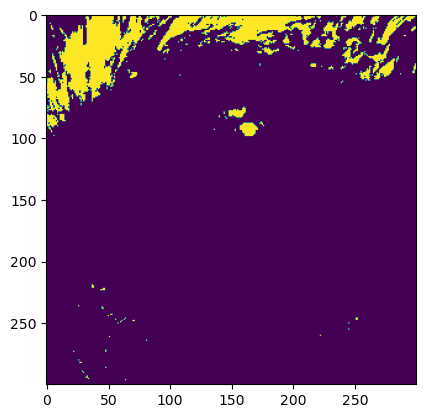

In [130]:
plt.imshow(th1)

In [131]:
contours, _ = cv2.findContours(th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

125

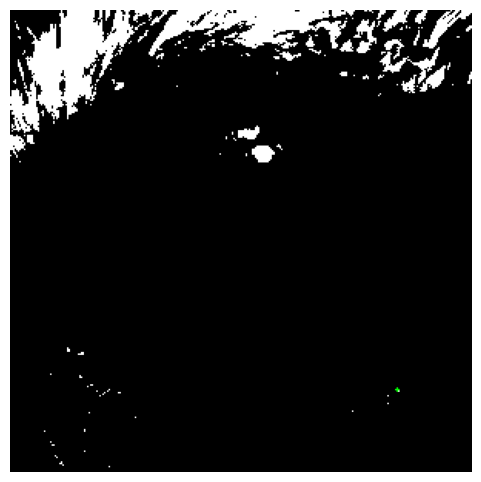

In [132]:
for contour in contours:
    # Approximate the contour to a circle
    (x, y), r = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(r)
    
    # Calculate circularity: (4 * π * Area) / Perimeter^2
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if perimeter > 0:
        circularity = (4 * np.pi * area) / (perimeter * perimeter)
        # Check if the circularity is close to 1 (perfect circle)
        if 0.7 < circularity < 1.3:
            circular_contour = contour
            break

# Draw the detected circle on the image (if found)
if circular_contour is not None:
    output_image = cv2.cvtColor(th1, cv2.COLOR_GRAY2BGR)
    cv2.circle(output_image, center, radius, (0, 255, 0), 2)
else:
    output_image = thresholded_image.copy()

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

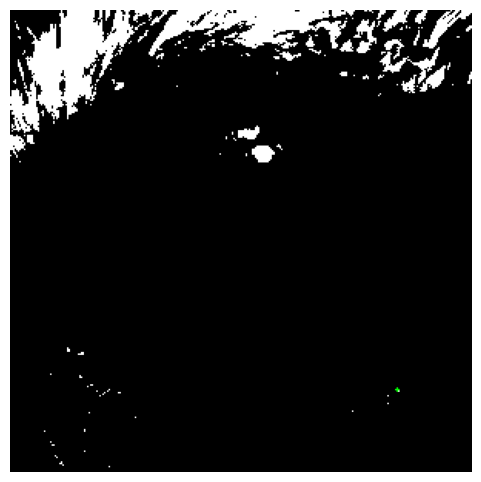

In [141]:
contour_data = []

for i, contour in enumerate(contours):
    (x, y), r = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(r)
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if perimeter > 0:
        circularity = (4 * np.pi * area) / (perimeter * perimeter)
        contour_data.append((i,circularity, center[0], center[1], radius, area))
contour_data = np.array(contour_data)
max_circularity_ind = np.argmax(contour_data[:,1])
center = (int(contour_data[max_circularity_ind][2]), int(contour_data[max_circularity_ind][3]))
radius = int(contour_data[max_circularity_ind][4])

output_image = cv2.cvtColor(th1, cv2.COLOR_GRAY2BGR)
cv2.circle(output_image, center, radius, (0, 255, 0), 2)
plt.figure(figsize=(6, 6))
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

In [142]:
contour_data.shape

(86, 6)

Text(0, 0.5, 'area')

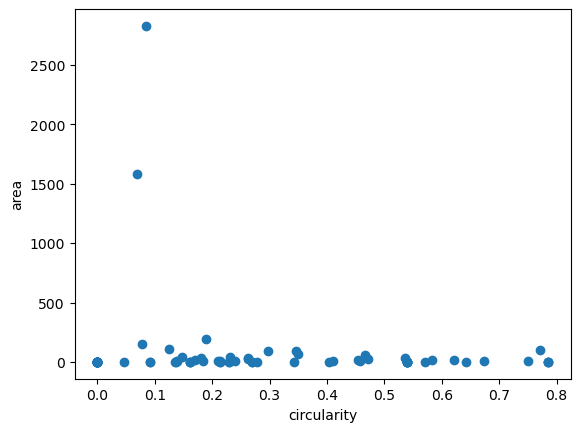

In [143]:
plt.scatter(contour_data[:,1], contour_data[:,5])
plt.xlabel('circularity')
plt.ylabel('area')

(array([30.,  9., 14.,  7.,  3.,  5.,  8.,  3.,  2.,  5.]),
 array([0.        , 0.07853982, 0.15707963, 0.23561945, 0.31415927,
        0.39269908, 0.4712389 , 0.54977871, 0.62831853, 0.70685835,
        0.78539816]),
 <BarContainer object of 10 artists>)

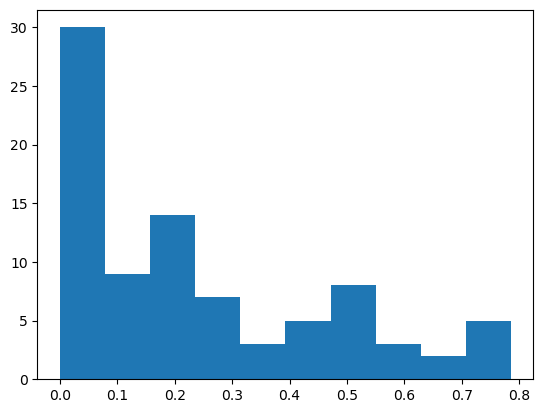

In [148]:
plt.hist(contour_data[:,1])

TypeError: 'NoneType' object is not subscriptable

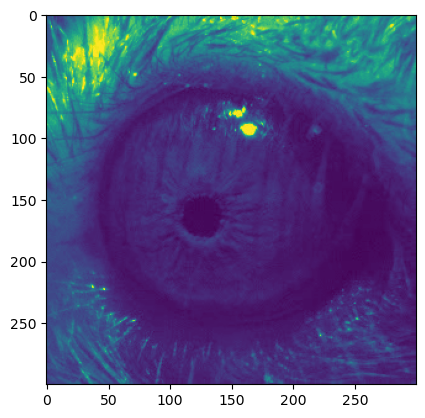

In [149]:
plt.imshow(frame[:,:,0])
for c in circles[0,:]:
    circle_to_plot = plt.Circle((c[0], c[1]), c[2], color='r', alpha=0.4)
    plt.gca().add_patch(circle_to_plot)
plt.show()

In [62]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a